In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import surface
import os
from os.path import join as ospj
from mayavi import mlab # oops mayavi doesn't work on python 3.11 - didn't use luo_wm_dev environment for this notebook
import pandas as pd


ModuleNotFoundError: No module named 'nibabel'

In [66]:

 
# Load SA axis data and medial wall indices for the left hemisphere
lh_sa_axis = nib.load("/cbica/projects/luo_wm_dev/SAaxis/SensorimotorAssociation_Axis_LH.fsaverage5.func.gii").darrays[0].data
lh_sa_axis = pd.DataFrame(lh_sa_axis)
lh_medial_wall_indices = nib.freesurfer.read_label("/cbica/projects/luo_wm_dev/input/HCPD/HCPD_freesurfer/fsaverage5/label/lh.Medial_wall.label")

# Load SA axis data and medial wall indices for the right hemisphere
rh_sa_axis = nib.load("/cbica/projects/luo_wm_dev/SAaxis/SensorimotorAssociation_Axis_RH.fsaverage5.func.gii").darrays[0].data
rh_sa_axis = pd.DataFrame(rh_sa_axis)
rh_medial_wall_indices = nib.freesurfer.read_label("/cbica/projects/luo_wm_dev/input/HCPD/HCPD_freesurfer/fsaverage5/label/rh.Medial_wall.label")





In [67]:

# Load FreeSurfer fsaverage5 centroid coordinates
fsaverage5_coords = pd.read_csv("/cbica/projects/luo_wm_dev/software/spin_test/rotate_parcellation/fsaverage5_fsLRmedialwall.Centroid.csv")
fsaverage5_coords = fsaverage5_coords.rename(columns={"V1":"x", "V2":"y", "V3":"z"})

# Extract coordinates of the medial wall from SA axis data for both hemispheres
lh_medial_wall_coords_sa_axis = fsaverage5_coords.iloc[lh_sa_axis.index[lh_sa_axis[0] == 0]]
rh_medial_wall_coords_sa_axis = fsaverage5_coords.iloc[rh_sa_axis.index[rh_sa_axis[0] == 0]]


In [68]:

# Extract coordinates of the medial wall from FreeSurfer for both hemispheres
lh_medial_wall_coords_fsaverage5 = fsaverage5_coords.iloc[lh_medial_wall_indices]
rh_medial_wall_coords_fsaverage5 = fsaverage5_coords.iloc[rh_medial_wall_indices]


In [110]:
rh_medial_wall_coords_fsaverage5

,x,y,z
27,-95.110001,30.899998,0.000000
28,-68.820000,50.000000,-52.569996
37,-16.250000,50.000000,-85.070000
60,-80.900002,58.780003,0.000000
80,-50.139999,70.200005,-50.570000
...,...,...,...
9962,-58.569996,29.920000,-75.330002
9963,-60.680000,26.440001,-74.959999
9964,-59.549999,23.219999,-76.910004
9965,-58.310001,19.959999,-78.750000


In [78]:

# Plot the medial wall from SA axis data in one color and from FreeSurfer in another color
fig = mlab.figure(bgcolor=(1, 1, 1), size=(1200, 600))

# Left hemisphere
mlab.points3d(lh_medial_wall_coords_sa_axis['x'], lh_medial_wall_coords_sa_axis['y'], lh_medial_wall_coords_sa_axis['z'],
              color=(0, 0, 1), scale_factor=1, mode='sphere', opacity=0.8, figure=fig)
mlab.points3d(lh_medial_wall_coords_fsaverage5['x'], lh_medial_wall_coords_fsaverage5['y'], lh_medial_wall_coords_fsaverage5['z'],
              color=(1, 0, 0), scale_factor=1, mode='sphere', opacity=0.8, figure=fig)

# Right hemisphere
mlab.points3d(rh_medial_wall_coords_sa_axis['x'], rh_medial_wall_coords_sa_axis['y'], rh_medial_wall_coords_sa_axis['z'],
              color=(0, 0, 1), scale_factor=1, mode='sphere', opacity=0.8, figure=fig)
mlab.points3d(rh_medial_wall_coords_fsaverage5['x'], rh_medial_wall_coords_fsaverage5['y'], rh_medial_wall_coords_fsaverage5['z'],
              color=(1, 0, 0), scale_factor=1, mode='sphere', opacity=0.8, figure=fig)

#mlab.colorbar(orientation='horizontal')
mlab.xlabel('X')
mlab.ylabel('Y')
mlab.zlabel('Z')

mlab.show()


qt.qpa.window: <QNSWindow: 0x2a167fd30; contentView=<QNSView: 0x2a167f620; QCocoaWindow(0x2a167f510, window=QWidgetWindow(0x2a167f060, name="QMainWindowClassWindow"))>> has active key-value observers (KVO)! These will stop working now that the window is recreated, and will result in exceptions when the observers are removed. Break in QCocoaWindow::recreateWindowIfNeeded to debug.
libpng warning: iCCP: known incorrect sRGB profile


In [84]:



from nilearn import surface, plotting
from nilearn import datasets

fsaverage = datasets.fetch_surf_fsaverage()

curv_right = surface.load_surf_data(fsaverage.curv_right)
curv_right_sign = np.sign(curv_right)

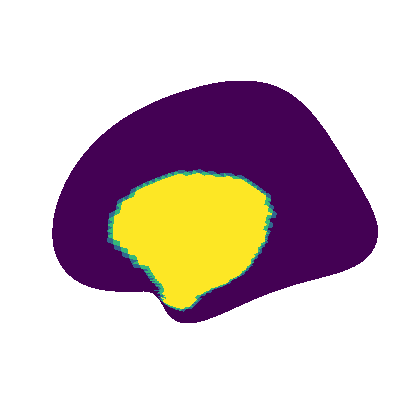

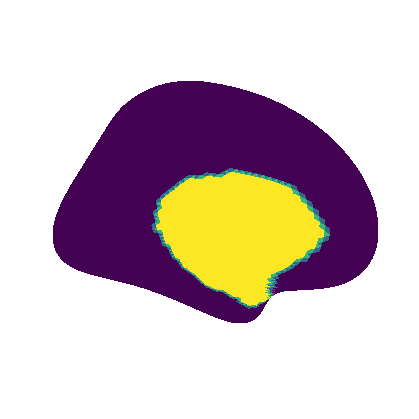

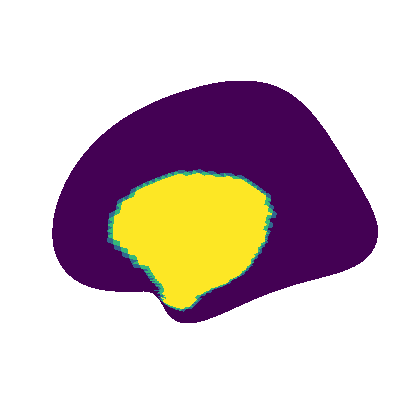

In [120]:
# first plot SA axis medial wall lh and rh

# convert SA axis medial wall to binary (0 for cortex, 1 for medial wall)
left_sa_axis = nib.load("/cbica/projects/luo_wm_dev/SAaxis/SensorimotorAssociation_Axis_LH.fsaverage5.func.gii").darrays[0].data
left_sa_axis_medial = np.where(left_sa_axis == 0, 1, 0)

right_sa_axis = nib.load("/cbica/projects/luo_wm_dev/SAaxis/SensorimotorAssociation_Axis_RH.fsaverage5.func.gii").darrays[0].data
right_sa_axis_medial = np.where(right_sa_axis == 0, 1, 0)


# save as giftis
left_sa_axis_medial = left_sa_axis_medial.astype(np.float32)
gii_data = nib.gifti.gifti.GiftiDataArray(left_sa_axis_medial)
gii_array = nib.gifti.gifti.GiftiImage(darrays=[gii_data])
nib.save(gii_array, "/cbica/projects/luo_wm_dev/SAaxis/SensorimotorAssociationAxis_fsaverage5_lh.medialwall.func.gii")


right_sa_axis_medial = right_sa_axis_medial.astype(np.float32)
gii_data = nib.gifti.gifti.GiftiDataArray(right_sa_axis_medial)
gii_array = nib.gifti.gifti.GiftiImage(darrays=[gii_data])
nib.save(gii_array, "/cbica/projects/luo_wm_dev/SAaxis/SensorimotorAssociationAxis_fsaverage5_rh.medialwall.func.gii")


In [132]:



# then plot freesurfer medial wall lh and rh
lh_medial_wall_gifti = np.zeros(10242)
lh_medial_wall_gifti[lh_medial_wall_indices] = 1
lh_medial_wall_gifti = lh_medial_wall_gifti.astype(np.float32)
gii_data = nib.gifti.gifti.GiftiDataArray(lh_medial_wall_gifti)
gii_array = nib.gifti.gifti.GiftiImage(darrays=[gii_data])
nib.save(gii_array, "/cbica/projects/luo_wm_dev/input/HCPD/HCPD_freesurfer/fsaverage5/label/lh_medial_wall_shape.gii")


rh_medial_wall_gifti = np.zeros(10242)
rh_medial_wall_gifti[rh_medial_wall_indices] = 1
rh_medial_wall_gifti = rh_medial_wall_gifti.astype(np.float32)
gii_data = nib.gifti.gifti.GiftiDataArray(rh_medial_wall_gifti)
gii_array = nib.gifti.gifti.GiftiImage(darrays=[gii_data])
nib.save(gii_array, "/cbica/projects/luo_wm_dev/input/HCPD/HCPD_freesurfer/fsaverage5/label/rh_medial_wall_shape.gii")


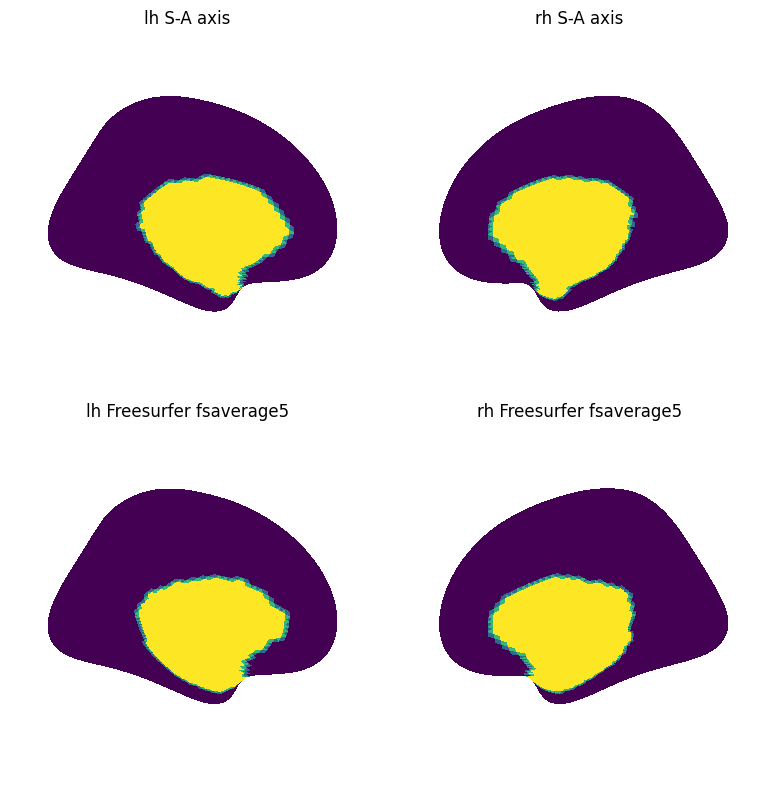

In [141]:

fig, axes = plt.subplots(2,2,figsize=(8,8), subplot_kw={'projection': '3d'})
plotting.plot_surf(fsaverage.infl_left, surf_map="/cbica/projects/luo_wm_dev/SAaxis/SensorimotorAssociationAxis_fsaverage5_lh.medialwall.func.gii", bg_map=None, hemi='left', view='medial', title="lh S-A axis", axes=axes[0, 0])
plotting.plot_surf(fsaverage.infl_right, surf_map="/cbica/projects/luo_wm_dev/SAaxis/SensorimotorAssociationAxis_fsaverage5_rh.medialwall.func.gii", bg_map=None, hemi='right', view='medial', title="rh S-A axis", axes=axes[0, 1])

plotting.plot_surf(fsaverage.infl_left, surf_map="/cbica/projects/luo_wm_dev/input/HCPD/HCPD_freesurfer/fsaverage5/label/lh_medial_wall_shape.gii", bg_map=None, hemi='left', view='medial', title="lh Freesurfer fsaverage5", axes=axes[1, 0])
plotting.plot_surf(fsaverage.infl_right, surf_map="/cbica/projects/luo_wm_dev/input/HCPD/HCPD_freesurfer/fsaverage5/label/rh_medial_wall_shape.gii", bg_map=None, hemi='right', view='medial',  title="rh Freesurfer fsaverage5", axes=axes[1, 1])
plt.tight_layout()
plt.show()

I mean, the medial walls definitely look very similar between SA-Axis and freesurfer's fsaverage5

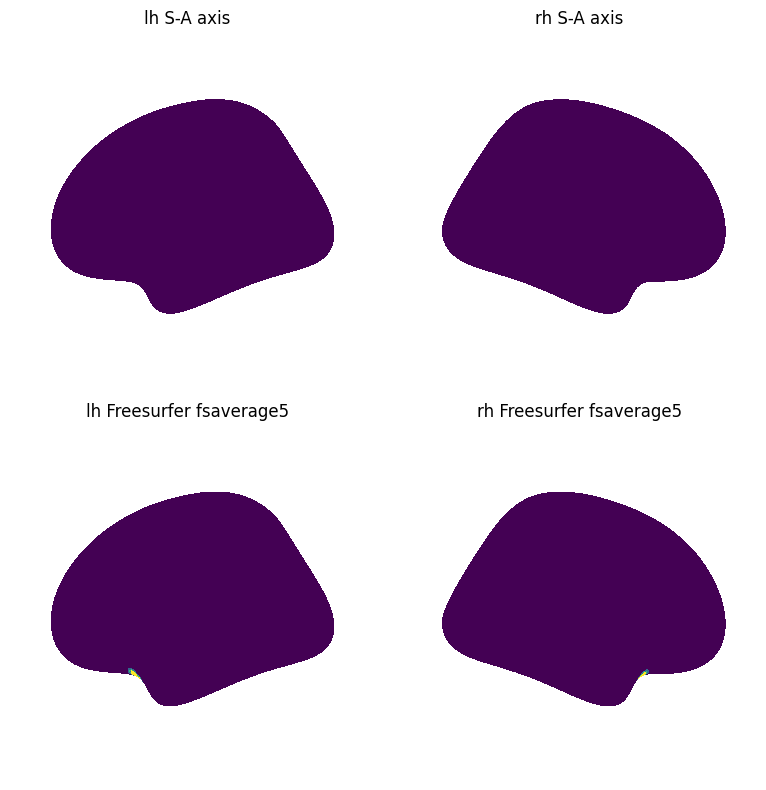

In [142]:
# just in case there are rogue vertices - check lateral hemis too
fig, axes = plt.subplots(2,2,figsize=(8,8), subplot_kw={'projection': '3d'})
plotting.plot_surf(fsaverage.infl_left, surf_map="/cbica/projects/luo_wm_dev/SAaxis/SensorimotorAssociationAxis_fsaverage5_lh.medialwall.func.gii", bg_map=None, hemi='left', view='lateral', title="lh S-A axis", axes=axes[0, 0])
plotting.plot_surf(fsaverage.infl_right, surf_map="/cbica/projects/luo_wm_dev/SAaxis/SensorimotorAssociationAxis_fsaverage5_rh.medialwall.func.gii", bg_map=None, hemi='right', view='lateral', title="rh S-A axis", axes=axes[0, 1])

plotting.plot_surf(fsaverage.infl_left, surf_map="/cbica/projects/luo_wm_dev/input/HCPD/HCPD_freesurfer/fsaverage5/label/lh_medial_wall_shape.gii", bg_map=None, hemi='left', view='lateral', title="lh Freesurfer fsaverage5", axes=axes[1, 0])
plotting.plot_surf(fsaverage.infl_right, surf_map="/cbica/projects/luo_wm_dev/input/HCPD/HCPD_freesurfer/fsaverage5/label/rh_medial_wall_shape.gii", bg_map=None, hemi='right', view='lateral',  title="rh Freesurfer fsaverage5", axes=axes[1, 1])
plt.tight_layout()
plt.show()

In [174]:
# then plot the vertices that differ between the two 
lh_differ_indices = np.where(lh_medial_wall_gifti != left_sa_axis_medial)[0]
lh_differ_indices = np.where(left_sa_axis_medial != lh_medial_wall_gifti )[0]
lh_differ_indices_gifti = np.zeros(10242)
lh_differ_indices_gifti[lh_differ_indices] = 1
lh_differ_indices_gifti = lh_differ_indices_gifti.astype(np.float32)
gii_data = nib.gifti.gifti.GiftiDataArray(lh_differ_indices_gifti)
gii_array = nib.gifti.gifti.GiftiImage(darrays=[gii_data])
nib.save(gii_array, "/cbica/projects/luo_wm_dev/SAaxis/lh_medialwall_SAaxis_freesurfer_diffvertices_shape.gii")


rh_differ_indices = np.where(rh_medial_wall_gifti != right_sa_axis_medial)[0]
rh_differ_indices = np.where(right_sa_axis_medial != rh_medial_wall_gifti )[0]
rh_differ_indices_gifti = np.zeros(10242)
rh_differ_indices_gifti[rh_differ_indices] = 1
rh_differ_indices_gifti = rh_differ_indices_gifti.astype(np.float32)
gii_data = nib.gifti.gifti.GiftiDataArray(rh_differ_indices_gifti)
gii_array = nib.gifti.gifti.GiftiImage(darrays=[gii_data])
nib.save(gii_array, "/cbica/projects/luo_wm_dev/SAaxis/rh_medialwall_SAaxis_freesurfer_diffvertices_shape.gii")



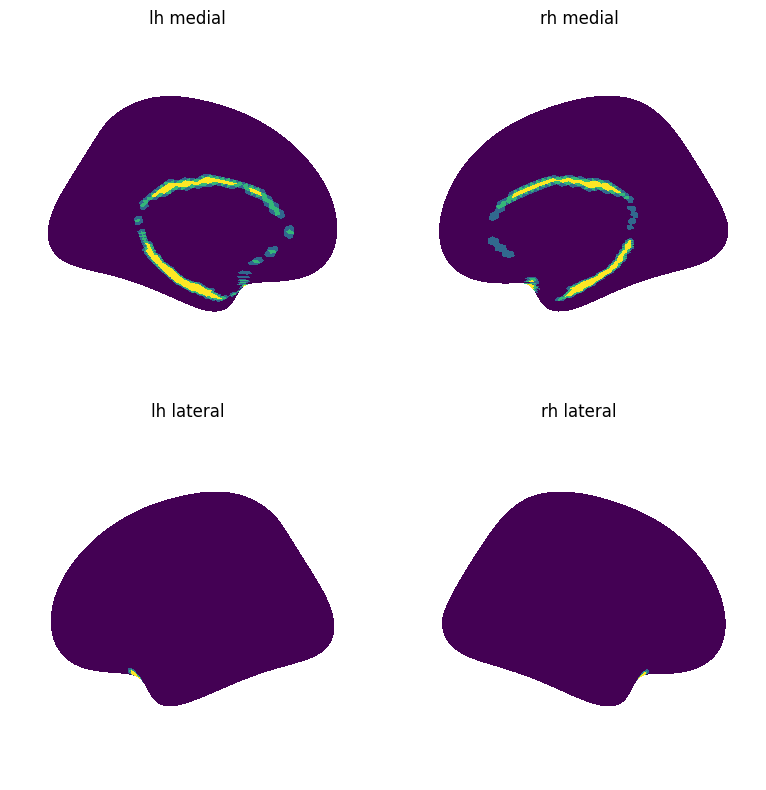

In [176]:
# just in case there are rogue vertices - check lateral hemis too
fig, axes = plt.subplots(2,2,figsize=(8,8), subplot_kw={'projection': '3d'})
plotting.plot_surf(fsaverage.infl_left, surf_map="/cbica/projects/luo_wm_dev/SAaxis/lh_medialwall_SAaxis_freesurfer_diffvertices_shape.gii", bg_map=None, hemi='left', view='medial', title="lh medial", axes=axes[0, 0])
plotting.plot_surf(fsaverage.infl_right, surf_map="/cbica/projects/luo_wm_dev/SAaxis/rh_medialwall_SAaxis_freesurfer_diffvertices_shape.gii", bg_map=None, hemi='right', view='medial', title="rh medial", axes=axes[0, 1])
 
plotting.plot_surf(fsaverage.infl_left, surf_map="/cbica/projects/luo_wm_dev/SAaxis/lh_medialwall_SAaxis_freesurfer_diffvertices_shape.gii", bg_map=None, hemi='left', view='lateral', title="lh lateral", axes=axes[1, 0])
plotting.plot_surf(fsaverage.infl_right, surf_map="/cbica/projects/luo_wm_dev/SAaxis/rh_medialwall_SAaxis_freesurfer_diffvertices_shape.gii", bg_map=None, hemi='right', view='lateral', title="rh lateral", axes=axes[1, 1])
 
plt.tight_layout()
plt.show()